## 0. Install Packages

In [1]:
!pip install scprep
!pip install umap-learn
!pip install phenograph
!pip install louvain
!pip install tasklogger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import scprep
import sklearn
import sklearn.cluster
import sklearn.manifold
import phenograph
import louvain
import matplotlib.pyplot as plt
import os
import tasklogger

%matplotlib inline 

<ipython-input-2-000838da684b>:9: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


## 2. Import data

### 2.1 - Load text data (.csv)



In [4]:
## Read in the Heart counts 
heart_data = scprep.io.load_csv( 'Heart-counts.csv',
                          cell_axis='row', sparse=True).transpose()

heart_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
B12.MAA000398.3_9_M.1.1,0.0,272.0,93.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,68.0,1.0,0.0,0.0,17.0,0.0
D16.MAA000398.3_9_M.1.1,0.0,21.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,389.0,3.0,6.0,0.0,41.0,0.0
F10.MAA000398.3_9_M.1.1,0.0,54.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,28.0,45.0,0.0,31.0,0.0,19.0,0.0
L17.MAA000398.3_9_M.1.1,0.0,21.0,0.0,27.0,0.0,27.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,38.0,0.0,0.0,11.0,0.0
N18.MAA000398.3_9_M.1.1,0.0,73.0,82.0,66.0,0.0,0.0,58.0,0.0,0.0,68.0,...,0.0,22.0,0.0,14.0,97.0,99.0,124.0,0.0,39.0,0.0


In [5]:
## Read in the Limb_Muscle counts 
limb_muscle_data = scprep.io.load_csv( 'Limb_Muscle-counts.csv',
                          cell_axis='row', sparse=True).transpose()

limb_muscle_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
L4.D042103.3_11_M.1,0.0,444.0,253.0,194.0,0.0,151.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1126.0,0.0,261.0,0.0,481.0,0.0
D1.D042103.3_11_M.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,293.0,0.0,0.0,0.0,0.0,0.0
N2.D042103.3_11_M.1,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H4.D042103.3_11_M.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0,0.0
E1.D042103.3_11_M.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17.0,98.0,0.0,0.0,0.0,0.0


### 2.2 -  Creating the annotations matrix

Now, we can combine our datasets into a single combined data matrix. 

In [6]:
data = [heart_data, limb_muscle_data]
batch_labels = ['Heart', 'Limb_Muscle']

## this combines batches together into a single DataFrame
data, sample_labels = scprep.utils.combine_batches(data, batch_labels)
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
B12.MAA000398.3_9_M.1.1_Heart,0.0,272.0,93.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,68.0,1.0,0.0,0.0,17.0,0.0
D16.MAA000398.3_9_M.1.1_Heart,0.0,21.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,389.0,3.0,6.0,0.0,41.0,0.0
F10.MAA000398.3_9_M.1.1_Heart,0.0,54.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,28.0,45.0,0.0,31.0,0.0,19.0,0.0
L17.MAA000398.3_9_M.1.1_Heart,0.0,21.0,0.0,27.0,0.0,27.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,38.0,0.0,0.0,11.0,0.0
N18.MAA000398.3_9_M.1.1_Heart,0.0,73.0,82.0,66.0,0.0,0.0,58.0,0.0,0.0,68.0,...,0.0,22.0,0.0,14.0,97.0,99.0,124.0,0.0,39.0,0.0


In [7]:
annotations = pd.read_csv('annotations_facs.csv', index_col='plate.barcode')[['cell','cell_ontology_class','tissue', 'subtissue']]
lookup = pd.Series(data.index).apply(lambda x: x.split('_')[0]+'_'+ x.split('_')[1]+'_'+ x.split('_')[2])
annotations = annotations.loc[annotations['cell'].isin(lookup.values)]

annotations.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cell,cell_ontology_class,tissue,subtissue
plate.barcode,,,,
B002765,A1.B002765.3_38_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
D042103,A1.D042103.3_11_M.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
D042186,A1.D042186.3_8_M.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
B002765,A10.B002765.3_38_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
B002769,A10.B002769.3_39_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb


In [8]:
data_annotations = [heart_data, limb_muscle_data]
data_annotations, sample_labels = scprep.utils.combine_batches(data_annotations, batch_labels,append_to_cell_names=False)
data_annotations = data_annotations.reset_index()
data_annotations = data_annotations.loc[data_annotations['index'].isin(annotations['cell'].values)]
data_annotations.set_index(['index'], inplace = True)

data_annotations.head()

<ipython-input-8-bb67fcb4ba4a>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_annotations = data_annotations.reset_index()


,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
index,,,,,,,,,,,,,,,,,,,,,
B12.MAA000398.3_9_M.1.1,0.0,272.0,93.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,68.0,1.0,0.0,0.0,17.0,0.0
D16.MAA000398.3_9_M.1.1,0.0,21.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,389.0,3.0,6.0,0.0,41.0,0.0
F10.MAA000398.3_9_M.1.1,0.0,54.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,28.0,45.0,0.0,31.0,0.0,19.0,0.0
L17.MAA000398.3_9_M.1.1,0.0,21.0,0.0,27.0,0.0,27.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,38.0,0.0,0.0,11.0,0.0
N18.MAA000398.3_9_M.1.1,0.0,73.0,82.0,66.0,0.0,0.0,58.0,0.0,0.0,68.0,...,0.0,22.0,0.0,14.0,97.0,99.0,124.0,0.0,39.0,0.0


In [9]:
annotations.reset_index()
annotations.index = data_annotations.index

annotations

,cell,cell_ontology_class,tissue,subtissue
index,,,,
B12.MAA000398.3_9_M.1.1,A1.B002765.3_38_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
D16.MAA000398.3_9_M.1.1,A1.D042103.3_11_M.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
F10.MAA000398.3_9_M.1.1,A1.D042186.3_8_M.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
L17.MAA000398.3_9_M.1.1,A10.B002765.3_38_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
N18.MAA000398.3_9_M.1.1,A10.B002769.3_39_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb
...,...,...,...,...
O18.D042473.3_10_M.1.1,P9.MAA000586.3_8_M.1.1,fibroblast,Heart,RA
P20.D042473.3_10_M.1.1,P9.MAA000587.3_8_M.1.1,endothelial cell,Heart,LV
I18.D042473.3_10_M.1.1,P9.MAA000589.3_9_M.1.1,endothelial cell,Heart,LV


### 2.3 - Creating the metadata matrix


In [10]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])

## adjust the path to metadata_FACS.csv as needed
metadata = pd.read_csv('metadata_FACS.csv', index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index

metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex
B12.MAA000398.3_9_M.1.1_Heart,MAA000398,3_9_M,Heart,LA,Viable,M
D16.MAA000398.3_9_M.1.1_Heart,MAA000398,3_9_M,Heart,LA,Viable,M
F10.MAA000398.3_9_M.1.1_Heart,MAA000398,3_9_M,Heart,LA,Viable,M
L17.MAA000398.3_9_M.1.1_Heart,MAA000398,3_9_M,Heart,LA,Viable,M
N18.MAA000398.3_9_M.1.1_Heart,MAA000398,3_9_M,Heart,LA,Viable,M


### 2.4 - Library size filtering

#### Visualing the library size distribution using `scprep`

There is a helper function for plotting library size from a gene expression matrix in scprep called [`scprep.plot.plot_library_size()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.plot_library_size).

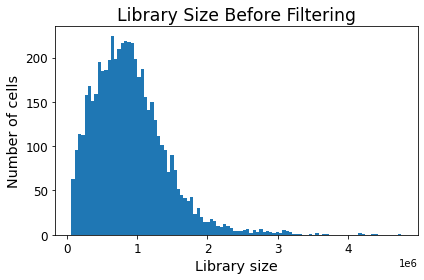

In [11]:
scprep.plot.plot_library_size(data_annotations,
                              log=False, title='Library Size Before Filtering')

Choose cutoffs above and below the main bulk of cells, removing cells that are both significantly smaller than average and significantly larger than average. Plot the result by running `scprep.plot.plot_library_size` with `cutoff=(low, high)` or `percentile=(low, high)` where low and high are values or percentiles that you choose.

/usr/local/lib/python3.8/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


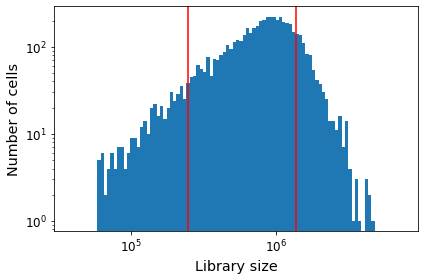

In [12]:
## Select appropriate percentiles (percentile=(low, high))
percentiles = (7, 85)

## This visualization will help choose good high and low values
## change the percentiles, then see how the graph changes when re-run
 
scprep.plot.plot_library_size(data_annotations, percentile=percentiles)
# =============

## Why I selected the percentiles? 
## Since this data comes from single cell sequencing, there might be many empty spaces/cells that lead
## to the extremely low value. In addition, there might also be cases where several cells are in one space,
## leading to extremely high value. Therefore, to get rid of these two extreme cases I set my 
## percentile=(7, 85)

### 2.5 - Selecting a cutoff

#### Filtering cells by library size

You can do this using [`scprep.filter.filter_library_size()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.filter.filter_library_size).

In [13]:
# ==================
# fill in your chosen `percentile` values
percentiles =  (7, 85)
data_annotations, annotations = scprep.filter.filter_library_size(data_annotations, annotations, percentile=percentiles)
# ==================

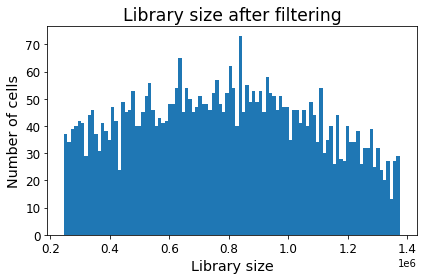

In [14]:
scprep.plot.plot_library_size(data_annotations, log=False, title='Library size after filtering')

The library size distribution is now much more constrained, which will reduce the effects of differences in library size (which can affect your results, even after normalization).

<a id='preprocessing'></a>
## 3. Preprocessing: Filtering, Normalizing, and Transforming

### Filtering

We filtered the data by: 
1. Removing dead cells  
2. Filtering by library size (if we did not do this prior to combining batches)
3. Removing genes that are expressed in relatively few cells.

### 3.1 - Filtering lowly expressed genes

/usr/local/lib/python3.8/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


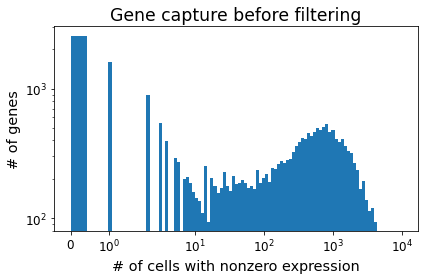

In [15]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data_annotations), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

#### Filtering rare genes

/usr/local/lib/python3.8/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


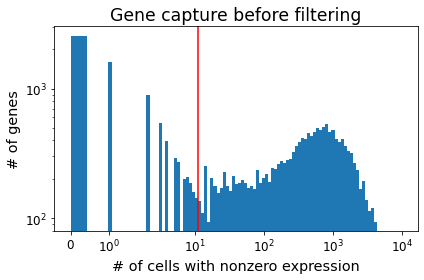

In [16]:
# ================
# choose a cutoff
scprep.plot.histogram(scprep.measure.gene_capture_count(data_annotations), 
                      cutoff = 11,
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')
# ================

Let's go ahead and remove those genes.

In [17]:
# ================
# choose a cutoff
cutoff = 11
data = scprep.filter.filter_rare_genes(data_annotations, min_cells=cutoff)
# ================

Plot the above histogram again for good measure. As you can see, the rare genes are all gone.

/usr/local/lib/python3.8/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


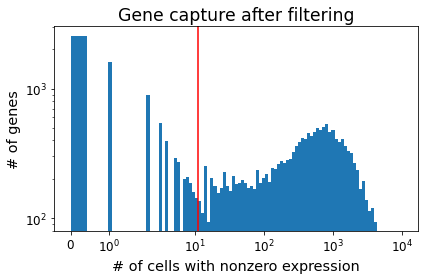

In [18]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data_annotations), cutoff=cutoff, log=True,
                      title="Gene capture after filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [19]:
data_annotations.shape

(4254, 23433)

After filtering, we have removed many thousands of genes. This will be our last filtering step, though you can always filter out aberrant expression on an ad hoc basis. As it stands, we've quite significantly reduced our dataset from 10,000 x 33,000 that we started with. And that's not even counting the cells we removed by library size before combining time points!

### 3.2 - Normalization

#### As you saw during filtering, the range of library sizes between cells can be quite extreme. We visualized this for one time point pre-filtering, but let's now visualize the whole dataset, post-filtering.

/usr/local/lib/python3.8/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


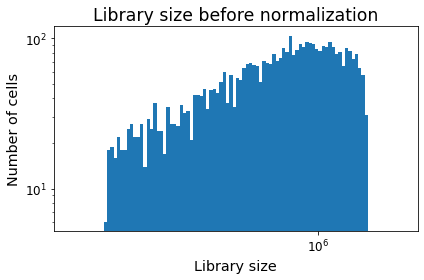

In [20]:
scprep.plot.plot_library_size(data_annotations, title='Library size before normalization')

To correct for differences in library sizes, we divide each cell by its library size and then rescale by the a fixed value, sometimes the median library size. The default in `scprep` is to rescale every cell to 10,000 counts to make numbers comparable across datasets.

In python this is performed using the preprocessing method [`scprep.normalize.library_size_normalize()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.normalize.library_size_normalize).

In [21]:
data_annotations, annotations['library_size'] = scprep.normalize.library_size_normalize(data_annotations, return_library_size=True)

If you plot the library sizes again, you'll see they are all the same.

/usr/local/lib/python3.8/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


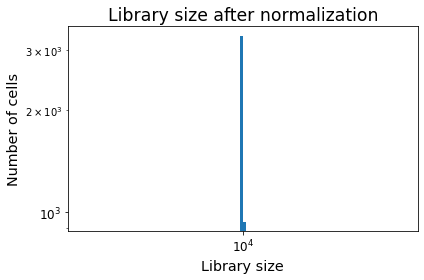

In [22]:
scprep.plot.plot_library_size(data_annotations, title='Library size after normalization')

### 3.3 - Gene Count Transformation

In scRNA-seq analysis, we often see that some genes are orders of magnitude more common than others. Let's have a look at the mean expression of each gene.

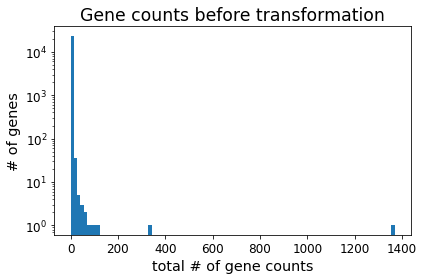

In [23]:
scprep.plot.histogram(data_annotations.mean(axis=0), log='y',
                      title="Gene counts before transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

In order to avoid these high-expression genes dominating the variation, the data is often $\log$-transformed. This typically requires the addition of some small value to avoid taking $\log(0)$. We avoid this issue entirely by instead taking the square root transform. The square root function has a similar form as the $\log$ function with the added benefit of being stable at 0.

In [24]:
data_annotations = scprep.transform.sqrt(data_annotations)

After transformation, you should see that the mean expression values are now much closer together.

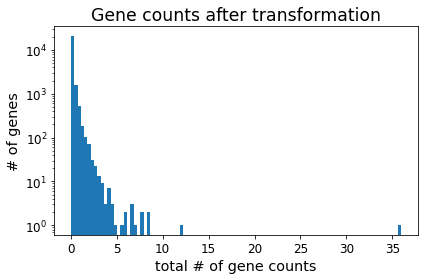

In [25]:
scprep.plot.histogram(data_annotations.mean(axis=0), log='y',
                      title="Gene counts after transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

## 4. Dimensionality reduction

### 4.1 - Visualization using Principle Components Analysis (PCA)

Here we're going to use the simplest dimensionality reduction method first. We don't expect PCA to work well because the dataset is so complex, but it's a good place to start with any dataset.

#### Running PCA on the data

In [26]:
data_pca = scprep.reduce.pca(data_annotations, n_components=50, method='dense')

In [27]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
index,,,,,,,,,,,,,,,,,,,,,
B12.MAA000398.3_9_M.1.1,31.968925,-6.487190,1.868909,-1.778599,-19.632091,-3.603516,3.817064,1.150241,4.646879,-1.886750,...,-2.857921,-1.465062,2.012259,1.042926,-0.815812,-0.507458,3.216753,0.214252,-1.380961,-1.142728
D16.MAA000398.3_9_M.1.1,-26.328803,-16.464755,0.396513,-7.192701,-23.175045,-8.340647,2.369670,-4.931900,5.225967,2.664278,...,-0.128150,-2.040814,0.234549,1.780655,4.423551,-2.774531,1.221330,-0.337260,-0.818498,-1.274660
F10.MAA000398.3_9_M.1.1,-5.550613,-4.086433,-2.707850,11.418744,-24.975361,-8.905636,2.819048,28.896731,-9.341462,2.391990,...,-0.716329,0.140343,-1.375216,1.270325,-0.422711,-0.264366,1.239857,-4.024900,-0.959591,-1.238844
L17.MAA000398.3_9_M.1.1,-4.399793,-5.059912,-2.785620,11.915047,-26.650932,-12.105657,3.956476,30.923436,-8.325862,1.547506,...,-1.418858,0.806567,-1.093710,-1.070132,1.267314,-3.071378,2.128808,-3.682831,-0.322020,-2.307616
N18.MAA000398.3_9_M.1.1,34.515234,-7.809199,2.531765,4.169454,-8.931321,5.506366,-4.115041,0.692960,2.964662,0.924835,...,-0.653850,2.129320,-3.344887,0.736779,1.837779,-0.224441,0.271243,0.847034,-1.932575,1.926964


#### Plotting PCs using `scprep.plot`

The scprep package has a number of handy plotting features that act as a wrapper to `matplotlib`. You should know how to use `matplotlib` for more complicated plotting, but you can make all the plots we need in this tutorial with some help from `scprep`.

The full documentaiton of `scprep.plot` can be found here:

https://scprep.readthedocs.io/en/stable/reference.html#module-scprep.plot

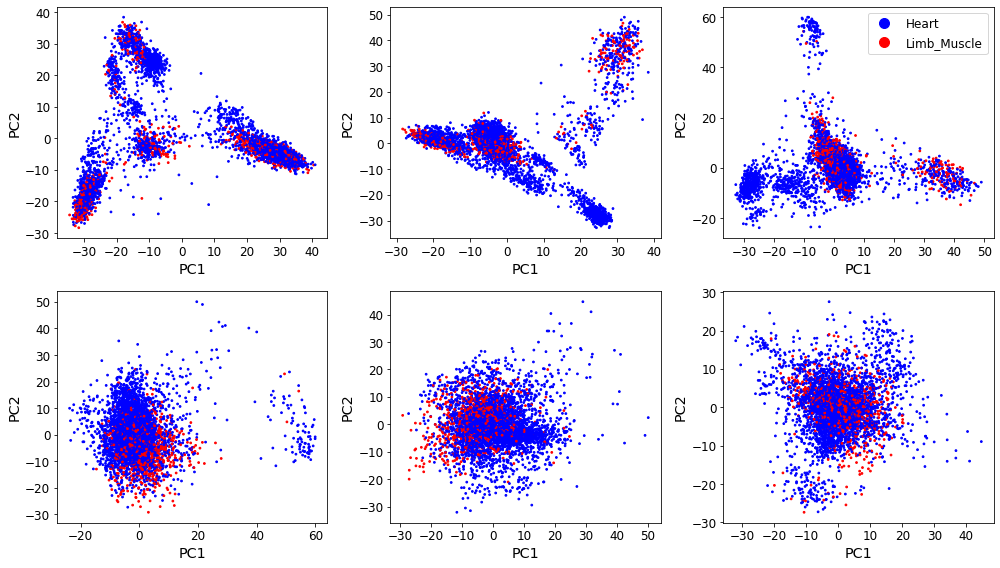

In [28]:
fig, axes = plt.subplots(2,3, figsize=(14,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=annotations['tissue'],
                        cmap='bwr', ax=ax,
                        label_prefix="PC", legend=legend)

fig.tight_layout()

<ipython-input-29-9a4cfaf286bb>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


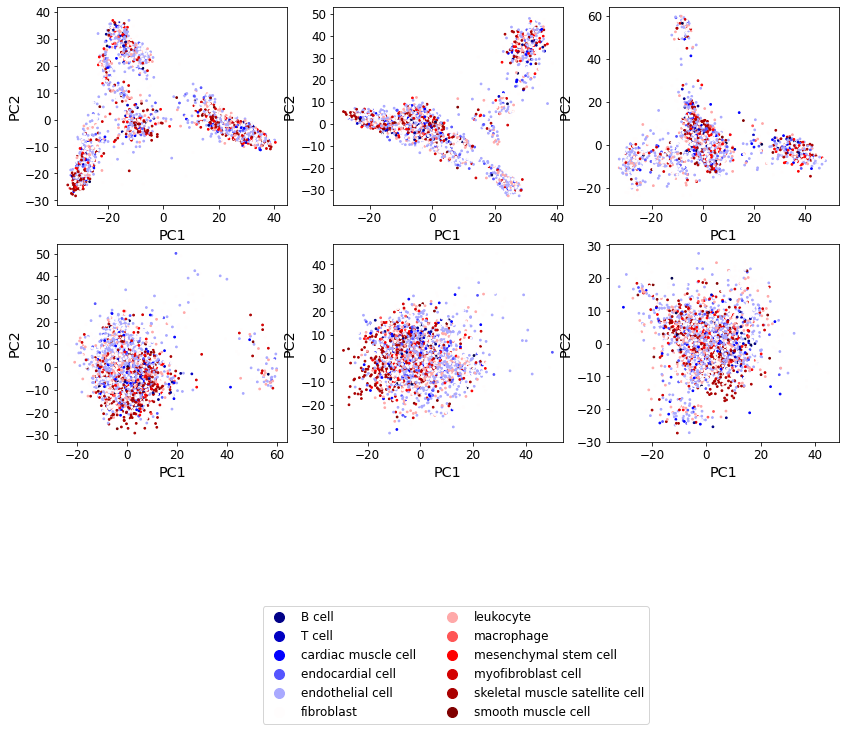

In [29]:
fig, axes = plt.subplots(2,3, figsize=(14,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=annotations['cell_ontology_class'],
                        cmap='seismic', ax=ax,legend_anchor=(0.2,-2),
                        label_prefix="PC", legend=legend)
fig.tight_layout()

### 4.2 - Visualization using t-SNE 

In [30]:
from sklearn.manifold import TSNE
tsne_data = TSNE(n_components=2, perplexity = 30).fit_transform(data_annotations)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


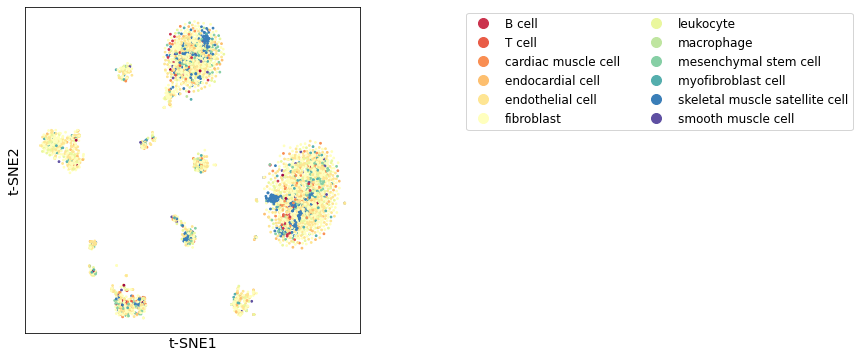

In [31]:
scprep.plot.scatter2d(tsne_data, c=annotations['cell_ontology_class'],
                      figsize=(6,6),legend_anchor=(1.3,1),
                      ticks=False, label_prefix='t-SNE',cmap='Spectral')

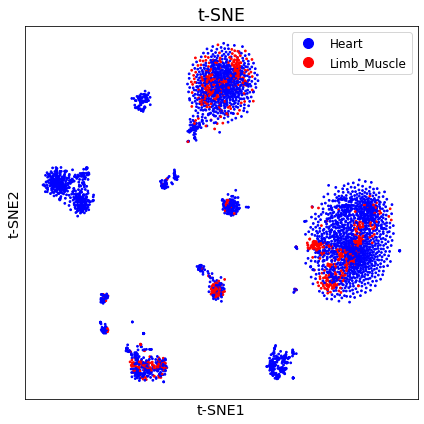

In [32]:
scprep.plot.scatter2d(tsne_data, c=annotations['tissue'],
                      figsize=(6,6),
                      ticks=False, label_prefix='t-SNE',cmap='bwr', title='t-SNE')

#### Plotting expression of a gene on the first two PCs

Let's plot expression of some genes


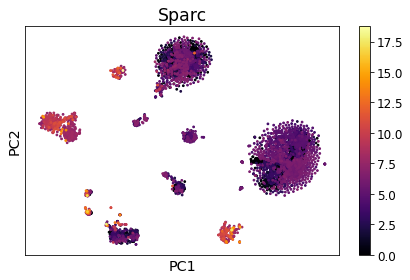

In [33]:
expression = scprep.select.select_cols(data_annotations, exact_word='Sparc')

# we will sort cells by maximum expression so we can see where the gene is expressed
sort_index = expression.sort_values().index

scprep.plot.scatter2d(tsne_data, c=expression.loc[sort_index], shuffle=False,
                     title='Sparc', ticks=None, label_prefix='PC')

### 4.3 - Embedding Data Using UMAP

The syntax for UMAP is based on many sklearn packages: `umap.UMAP().fit_transform`. UMAP is relatively fast, so you **won't need to use the subsampled data.**

UMAP's `n_neighbors` parameter describes the size of the neighborhood around each point. The `min_dist` parameter describes how tightly points can be packed together. The authors recommend values between 2 and 200 for `n_neighbors`, and between 0 and 0.99 for `min_dist`. Try a range of different values in and outside of these ranges and discuss the results with your group.

If you would like, feel free to play around with the `min_dist` and `n_neighbors` parameters.

In [34]:
data_umap = umap.UMAP(random_state=42).fit_transform(data_pca)

In [35]:
data_umap = pd.DataFrame(data_umap, index = data_annotations.index)

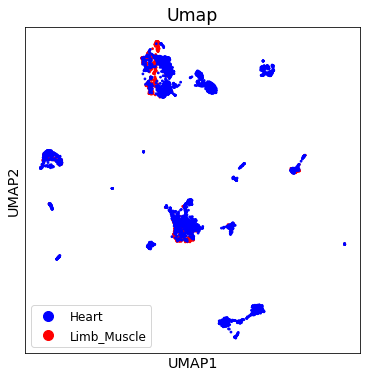

In [36]:
# ================
# Plot the UMAP coordinates
# **colored by tissue** 
fig, ax = plt.subplots(figsize=(6,6)) 

scprep.plot.scatter2d(data_umap, shuffle=False, ticks=None,title='Umap',
                      c=annotations['tissue'], ax=ax, cmap='bwr', label_prefix="UMAP"
)
# ================

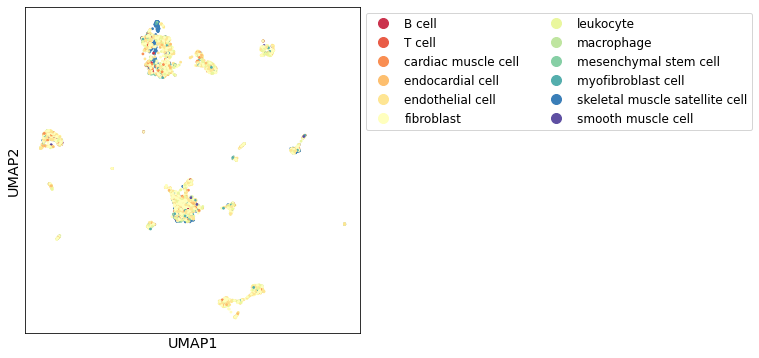

In [37]:
# ================
# Plot the UMAP coordinates
# **colored by cell_ontology_class** 
fig, ax = plt.subplots(figsize=(6,6)) 

scprep.plot.scatter2d(data_umap,  shuffle=False, ticks=None,legend_anchor=(1,1),
                      c=annotations['cell_ontology_class'], ax=ax, cmap='Spectral', label_prefix="UMAP"
)

#### Let's look at some marker genes!

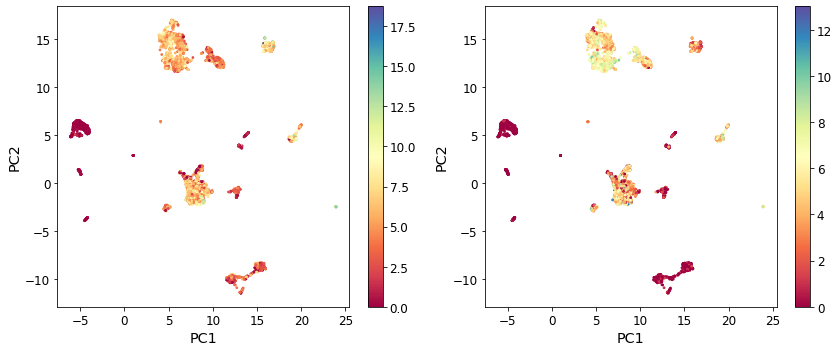

In [38]:
genes_for_plotting = ['Sparc', 'Igfbp7']
# ================
# Plot two subplots of the UMAP coordinates
# coloring by Sparc and Igfbp7
fig, axes = plt.subplots(1,2, figsize=(12,5))

for gene, ax in zip(genes_for_plotting, axes.flatten()):
    expression = scprep.select.select_cols(data_annotations, exact_word=gene) 
    sort_index = expression.sort_values().index

    scprep.plot.scatter2d(data_umap,
                          c=expression, 
                          cmap='Spectral', 
                          ax=ax,
                          label_prefix="PC")
# ================

fig.tight_layout()

## 5. Clustering

### 5.1 - Introduction to clustering

#### What is clustering?

The goal of clustering is to identify a partition of the data such that all of the observations within each partition (called a cluster) are more similar to each other than they are to those in other clusters. Many clustering algorithms exist, and they each have their own quirks (just like visualization algorithms). `sklearn` has implementations for some of the most popular ones and their [User Guide on Clustering](https://scikit-learn.org/stable/modules/clustering.html) is a good resource to understand general clustering approaches.

Here, we run a variety of clustering algorithms. We'll use `tasklogger` to measure how long each one takes.

In [39]:
# sometimes there is a runtime permission error, we enable run with this chmod
!chmod 700 /content/drive/MyDrive/bioe_190_290/pythonpkg/phenograph/louvain/*

# Phenograph is a super-sophisticate clusterer that automatically estimates
# how many clusters there are!!
phenograph_clusters, _, _ = phenograph.cluster(data_pca)

# how many seconds did phenograph take on this dataset ?
# 21.07433819770813 seconds

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5973923206329346 seconds
Jaccard graph constructed in 1.752887487411499 seconds
Wrote graph to binary file in 0.09366917610168457 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.898866
After 7 runs, maximum modularity is Q = 0.900113
Louvain completed 27 runs in 12.162400722503662 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 14.934271335601807 seconds


In [40]:
## kmeans is one of the most common clustering algorithms, but it makes a lot of 
## assumption about our data (that might not be true)

# pick a value for n_clusters (something between 2 and 30 is reasonable)
# change answer based on the visualization below
with tasklogger.log_task("KMeans"):
    kmeans_clusters = sklearn.cluster.KMeans(n_clusters=11).fit_predict(data_pca)

# how many seconds did kmeans take on this dataset ?
# 2.12 seconds

Calculating KMeans...
Calculated KMeans in 1.01 seconds.


### 5.2 - Clustering single cell data

#### Clustering methods for single cell RNA-seq

In the previous exercise, we compared three popular algorithms for clustering: KMeans, Spectral Clustering, and Louvain.

#### Reordering clusters by PCA coordinates

By default, cluster numbers are meaningless. This makes it difficult to compare clusterings, because cluster "0" can refer to entirely different cells between runs of the same algorithm.

To enforce some consistency, we are going to reorder the clusters so that cluster "0" is always on the far right of the PCA plot, and the highest-numbered cluster is always on the far left.

In [41]:
clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters }

for alg in clusterings:
    cl_nu = scprep.utils.sort_clusters_by_values(clusterings[alg], -data_pca.iloc[:,0])
    clusterings[alg] = cl_nu

Now we will visualize the clusters!! (we also label the number of clusters for each method at the top of the plot)

#### NOTE: Phenograph's choice of n_clusters is CONTEXT SPECIFIC -- it is not necessarily a good choice when using a different algorithm

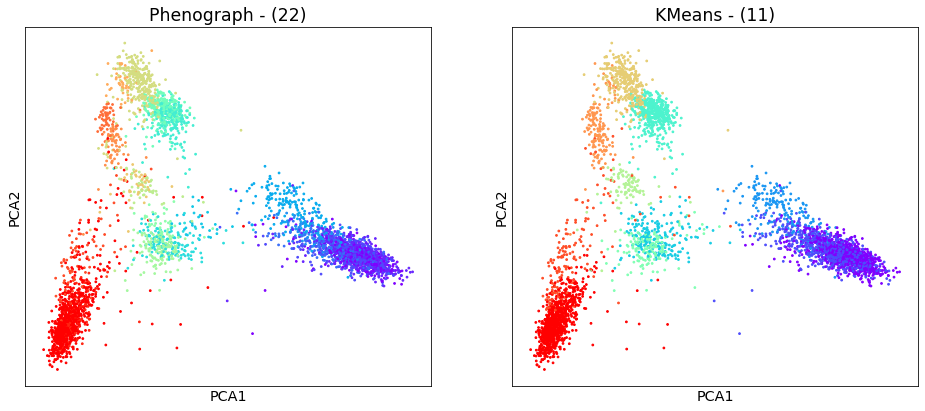

In [42]:
fig, axes = plt.subplots(1,2, figsize=(16,16), subplot_kw={'aspect':'equal'})

for ax, algorithm in zip(axes.flatten(), clusterings):
  scprep.plot.scatter2d(data_pca, c=clusterings[algorithm], cmap=plt.cm.rainbow,
                        title='{} - ({})'.format(algorithm, len(np.unique(clusterings[algorithm]))), 
                        ticks=False, label_prefix="PCA", legend=False, discrete=True,
                        ax=ax)

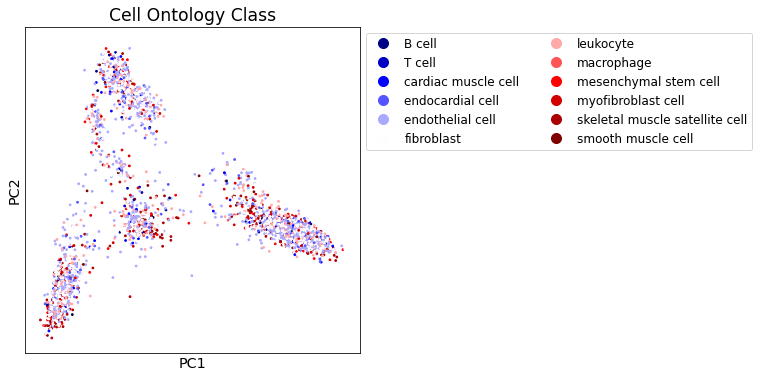

In [43]:
fig, ax = plt.subplots(figsize=(6,6)) ## feel free to adjust size

scprep.plot.scatter2d(data_pca,  shuffle=False, ticks=None,legend_anchor=(1,1),title='Cell Ontology Class',
                      c=annotations['cell_ontology_class'], ax=ax, cmap='seismic', label_prefix="PC"
)

### 5.3 - Rationally choosing n_clusters

Refer back to assignment 4 to choose a good number of clusters. If you run into problems with packages, just make a decent guess.

## 6. Analysis

Plot the expression of each of these genes on the low-dimension cell plot (PCA, UMAP , whichever
you chose). Do each gene individually so that we have 9 small plots to take up less space, perhaps
arranged in a 3x3 grid.

Use the "Differential expression" section below to find some genes that might be interesting.

### Gene list:

* Sparc
* Igfbp7
* Ltbp4
* Tyrobp
* Serpinh1
* Nfib
* Ptrf
* Sparcl1
* Fcer1g

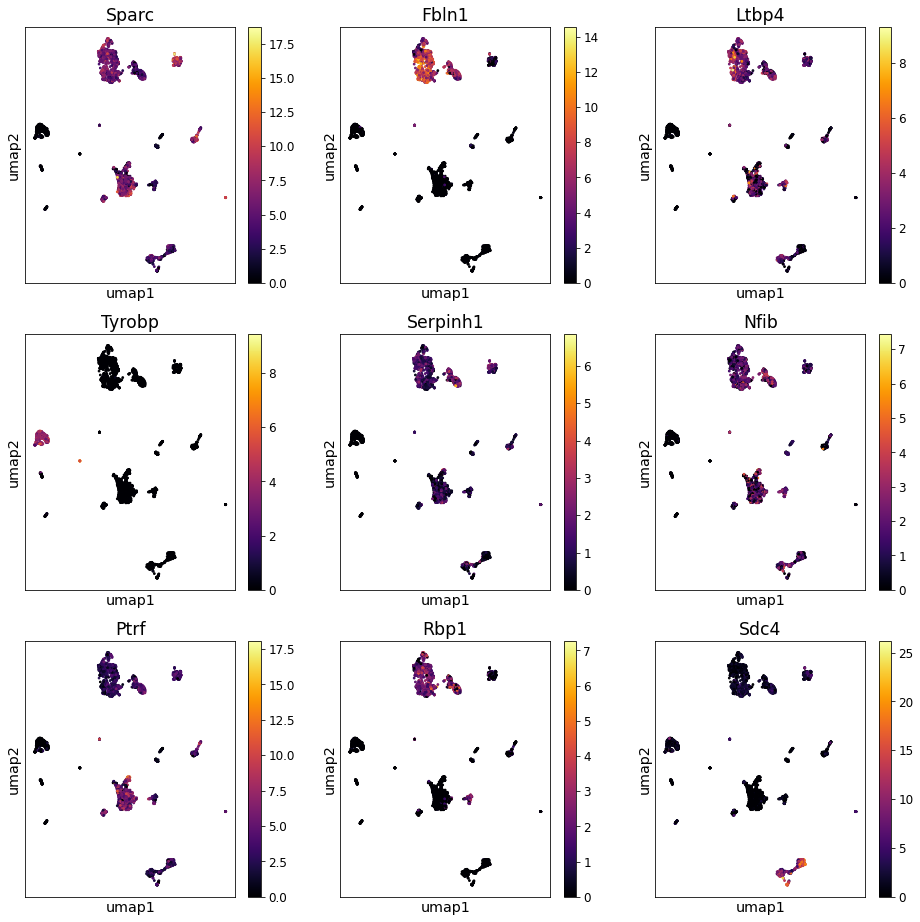

In [44]:
gene_list = ['Sparc', 'Fbln1', 'Ltbp4', 'Tyrobp', 'Serpinh1', 'Nfib', 'Ptrf', 'Rbp1', 'Sdc4']

fig, axes = plt.subplots(3,3, figsize=(16,16))

for gene, ax in zip(gene_list, axes.flatten()):
  expression = scprep.select.select_cols(data_annotations, exact_word=gene)

  scprep.plot.scatter2d(data_umap, c=expression, shuffle=False,
                      title=gene, ticks=None, label_prefix='umap', ax= ax)

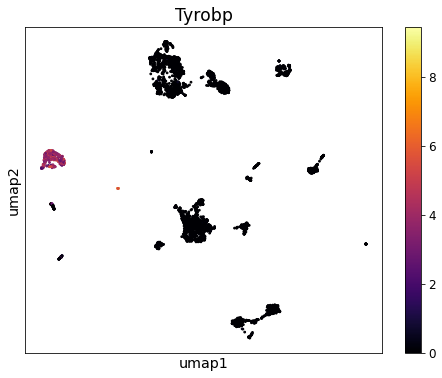

In [45]:
fig, ax = plt.subplots(figsize=(8,6)) 

expression_Tyrobp = scprep.select.select_cols(data_annotations, exact_word='Tyrobp')

scprep.plot.scatter2d(data_umap, c=expression_Tyrobp, shuffle=False,
                      title='Tyrobp', ticks=None, label_prefix='umap',ax=ax)

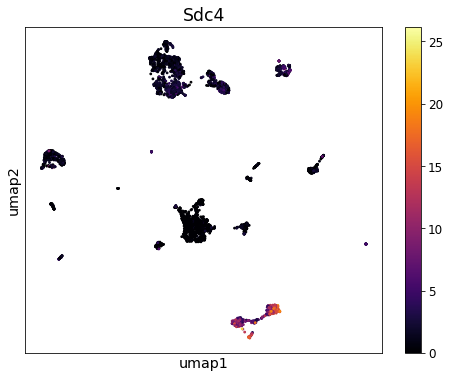

In [46]:
fig, ax = plt.subplots(figsize=(8,6)) 

expression_Tyrobp = scprep.select.select_cols(data_annotations, exact_word='Sdc4')

scprep.plot.scatter2d(data_umap, c=expression_Tyrobp, shuffle=False,
                      title='Sdc4', ticks=None, label_prefix='umap',ax=ax)

### 6.1 - Characterizing clusters

Now, we want to characterize gene expression in each cluster to identify the cell type of that cluster. Cell type is easy to grasp intuitively, but hard to formalize. Generally, we want a cell that expresses a set of genes differently than the rest of the cells in the dataset. 

#### Selecting a set of clusters


In [47]:
# ==============
# choose clustering method from 'Phenograph' and 'KMeans'

clusters = clusterings['KMeans']
# ==============

#### Jitterplot

The following plot is called a [jitterplot](https://scprep.readthedocs.io/en/stable/examples/jitter.html). This plot is similar to a [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) or a [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html), but is computationally cheaper. The goal of this plot is to examine the distribution of values associated with each cell in a set of clusters.

Each point is a cell and the x-axis represents the cluster assignment of that cell. There's a little bit of noise added to the x-position of the cell (that's the jitter). The y-axis represents expression of a given gene.

You can change which gene is plotted by changing the `curr_gene` variable. All of the genes in the above plot will work.

#### Raw data

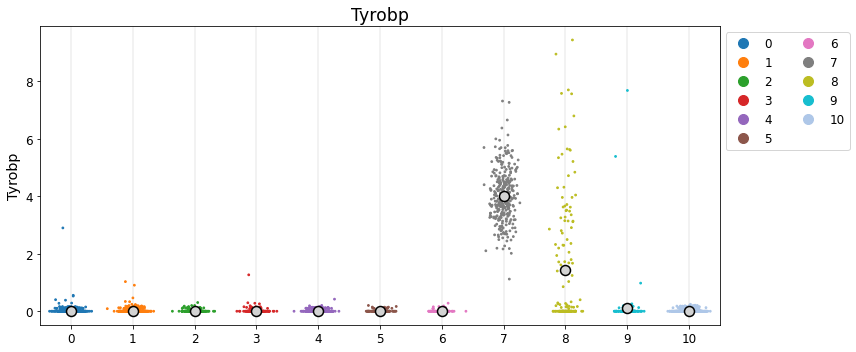

In [48]:
curr_gene = 'Tyrobp'
curr_expression = scprep.select.select_cols(data_annotations, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

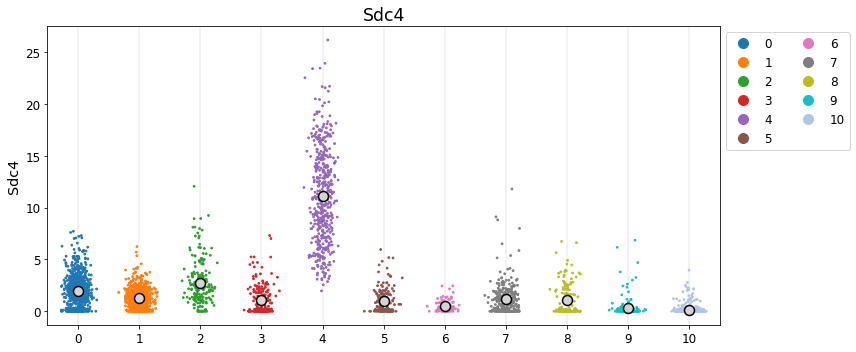

In [49]:
## select an interesting gene from the list in 3.0

curr_gene = 'Sdc4'
curr_expression = scprep.select.select_cols(data_annotations, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

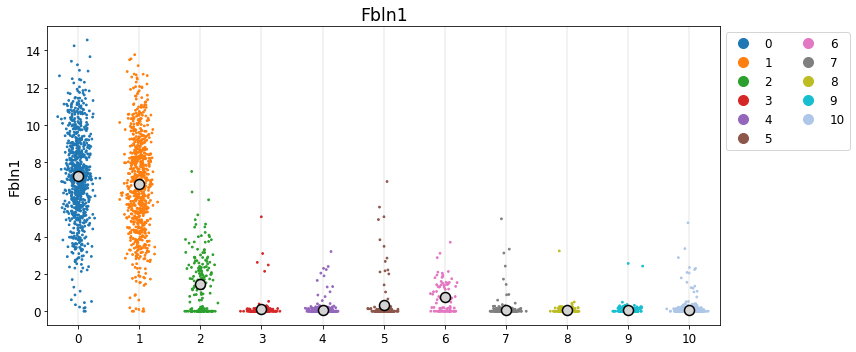

In [50]:
## select an interesting gene from the list in 3.0

curr_gene = 'Fbln1'
curr_expression = scprep.select.select_cols(data_annotations, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

### 6.2 - Research


In [51]:
clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters}

In [52]:
annotations.head()

,cell,cell_ontology_class,tissue,subtissue,library_size
index,,,,,
B12.MAA000398.3_9_M.1.1,A1.B002765.3_38_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb,731256.0
D16.MAA000398.3_9_M.1.1,A1.D042103.3_11_M.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb,782355.0
F10.MAA000398.3_9_M.1.1,A1.D042186.3_8_M.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb,412171.0
L17.MAA000398.3_9_M.1.1,A10.B002765.3_38_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb,334065.0
N18.MAA000398.3_9_M.1.1,A10.B002769.3_39_F.1.1,skeletal muscle satellite cell,Limb_Muscle,ForelimbandHindlimb,499001.0


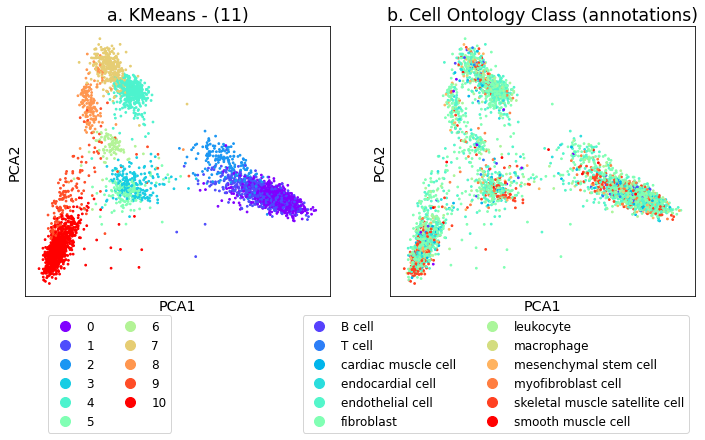

In [53]:
fig, axes = plt.subplots(1,2, figsize=(12,12), subplot_kw={'aspect':'equal'})

scprep.plot.scatter2d(data_pca, c=clusters, cmap=plt.cm.rainbow,
                      title='a. {} - ({})'.format('KMeans', len(np.unique(clusters))), 
                      ticks=False, label_prefix="PCA",discrete=True,legend_anchor=(0.5,-0.05),
                      ax=axes[0])

## Modify the following to print the cell types (etc) INSTEAD OF the clusters
scprep.plot.scatter2d(data_pca, c=annotations['cell_ontology_class'], cmap=plt.cm.rainbow,
                      title='b. Cell Ontology Class (annotations)', 
                      ticks=None, label_prefix="PCA", discrete=True,legend_anchor=(1,-0.05),
                      ax=axes[1])

### 6.3 - Differential expression

In the above exercise, we manually inspected known marker genes to annotate clusters. Here, we're going to simply identify the genes that change the most between two groups. As discussed in lecture, there are several ways to calculate differential expression. We are going to focus on the mean-difference and the rank-sum statistic.

You can easily calculate basic differential expression statistics using `scprep.stats.differential_expression` and `scprep.stats.differential_expression_by_cluster`. More details about these methods can be found in the [documentation](https://scprep.readthedocs.io/en/stable/reference.html#scprep.stats.differential_expression).



In [54]:
data_sparse = scprep.utils.SparseDataFrame(data_annotations)

In [55]:
## pick a cluster to test
curr_cluster = 4
with tasklogger.log_task("t-test"):
    ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster], 
                                                         data_sparse[clusters != curr_cluster], 
                                                         measure='ttest')

Calculating t-test...
Calculated t-test in 41.12 seconds.


/usr/local/lib/python3.8/dist-packages/scprep/stats.py:463: RuntimeWarning: invalid value encountered in true_divide
  return mean_difference(X, Y) / paired_std


In [56]:
top_genes = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

#### Print the 20 most differentially expressed genes

In [57]:
top_genes.head(n=20)

Igfbp7     69.780538
Sparcl1    69.014526
Nrp1       58.077543
Dcn        54.625378
Ecm1       53.963121
Mgp        53.649474
Cst3       52.535674
Itm2b      51.632929
Lum        51.401471
Ly6a       50.351836
Prr13      49.798079
Ly6e       49.203515
Fbln1      47.936902
Cd82       47.824784
Sdc4       47.763485
Ccnd2      47.138938
Tm4sf1     46.968644
Rbp1       46.912040
Ccdc80     46.541580
Col1a2     45.537531
Name: ttest, dtype: float64